# Importing Data

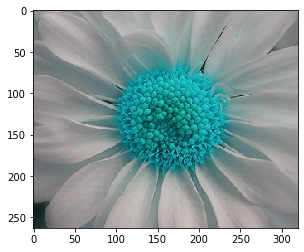

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2
import random

CATEGORIES = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Viewing a Sample of the Data
for category in CATEGORIES:
    # Setting path
    path = os.path.join(os.pardir, 'Data', 'Flowers', category)

    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
        plt.imshow(img_array)
        plt.show()
        break
    break

In [73]:
# Pixel Data of the image
print(img_array)

[[[133 135 135]
  [136 138 138]
  [142 142 142]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[132 134 134]
  [135 137 137]
  [139 141 141]
  ...
  [153 153 153]
  [156 156 156]
  [148 148 148]]

 [[131 133 133]
  [134 136 136]
  [139 141 141]
  ...
  [153 153 153]
  [155 155 155]
  [146 146 146]]

 ...

 [[ 27  48  45]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [125 126 130]
  [125 126 130]
  [124 125 129]]

 [[ 26  47  44]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [125 126 130]
  [125 126 130]
  [125 126 130]]

 [[ 26  47  44]
  [ 26  47  44]
  [ 26  47  44]
  ...
  [127 128 132]
  [127 128 132]
  [127 128 132]]]


In [74]:
# Shape of a sample image
print(img_array.shape)

(263, 320, 3)


In [75]:
# Function to print an image
def print_image(img):
    plt.imshow(img)
    plt.show()

### Since we want uniformity I will choose an appropriate size to reshape all the images.

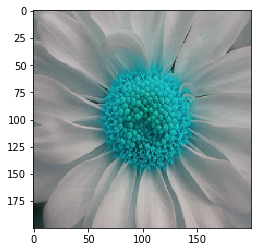

In [76]:
IMG_SIZE = 200 # This seems like a reaosable size such that too much info is not lost
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
print_image(new_array)

In [77]:
# Creating Training Data

training_data = []

def create_training_data():
    for category in CATEGORIES:
        # Setting path
        path = os.path.join(os.pardir, 'Data', 'Flowers', category)

        # Labeling the class
        class_num = CATEGORIES.index(category)

        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                # Converting RBG to RGB
                img_array = img_array[:, :, [2, 1, 0]]
                
                # Resizing
                img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([img_array, class_num])
            except Exception as e:
                pass

create_training_data()

In [78]:
print(len(training_data)) # We could not load 3 images

4323


In [79]:
# Shuffling the training data
random.shuffle(training_data)

for sample in training_data[:10]:
    print(sample[1])

0
3
3
1
4
3
1
2
4
4


In [80]:
X = []
y = []

for features, label in training_data:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y = np.array(y)

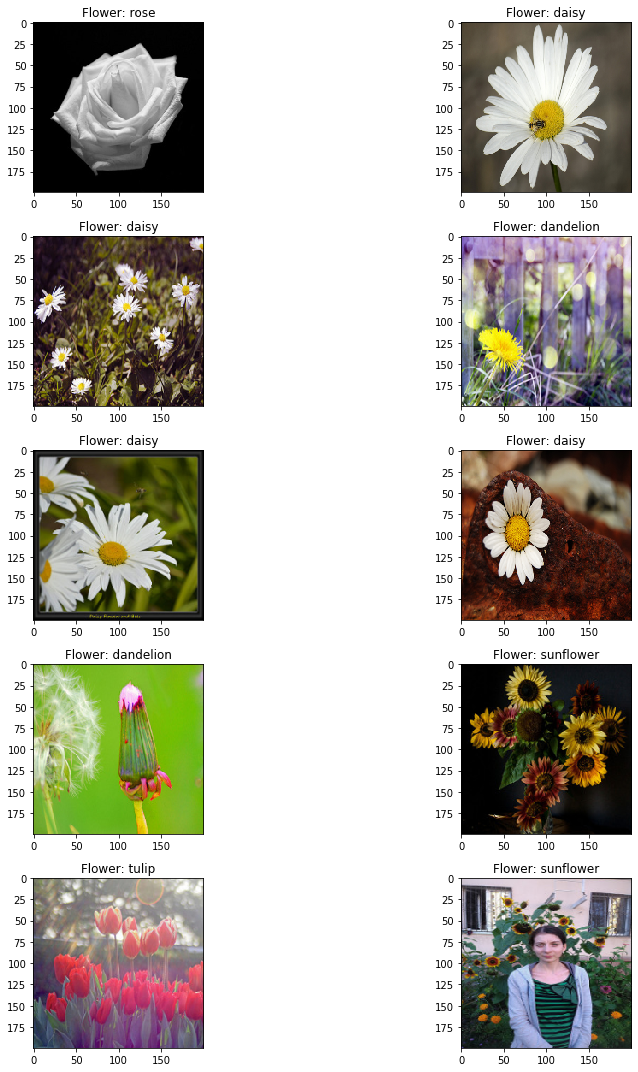

In [81]:
# Plotting Some Randome Samples
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l= random.randint(0,len(y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+ str(CATEGORIES[y[l]]))
        
plt.tight_layout()

# Building Basic Models

In [82]:
# Performing a test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

# Normalizing data
X_train = np.divide(X_train, 255)
X_test = np.divide(X_test, 255)

In [13]:
# Function to test model
def test_model(model, trials):
    total_score = 0
    for trial in range(trials):
        train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)
        model.fit(X_train,  y_train)
        total_score += model.score(X_test, y_test)
    print(f"Average Accuracy of the model : {round(total_score / trials, 3)}") 

In [14]:
def evaluate_model(model, X, y):
    val_loss, val_acc = model.evaluate(X, y)
    print(val_loss, val_acc)

## Dummy Model

In [15]:
from sklearn.dummy import DummyClassifier

dummy_model = DummyClassifier(strategy = "most_frequent")

test_model(dummy_model, 10)

Average Accuracy of the model : 0.272


# Building Deep Learning Models

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

## Dense Layer Neural Network

In [23]:
model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(5,activation = tf.nn.softmax))

model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
109/109 [==============================] - 12s 113ms/step - loss: 9.0899 - accuracy: 0.3326
Epoch 2/10
109/109 [==============================] - 13s 115ms/step - loss: 2.0322 - accuracy: 0.4083
Epoch 3/10
109/109 [==============================] - 13s 121ms/step - loss: 1.5327 - accuracy: 0.4193
Epoch 4/10
109/109 [==============================] - 13s 122ms/step - loss: 1.3089 - accuracy: 0.4552
Epoch 5/10
109/109 [==============================] - 13s 119ms/step - loss: 1.3055 - accuracy: 0.4714
Epoch 6/10
109/109 [==============================] - 13s 120ms/step - loss: 1.2847 - accuracy: 0.4806
Epoch 7/10
109/109 [==============================] - 13s 122ms/step - loss: 1.2989 - accuracy: 0.4575
Epoch 8/10
109/109 [==============================] - 13s 123ms/step - loss: 1.2217 - accuracy: 0.4743
Epoch 9/10
109/109 [==============================] - 13s 124ms/step - loss: 1.2361 - accuracy: 0.4907
Epoch 10/10
109/109 [==============================] - 14s 125ms/step - l

In [18]:
evaluate_model(model, X_test, y_test)

28/28 [==============================] - 0s 17ms/step - loss: 1.4336 - accuracy: 0.3988
1.4335721731185913 0.3988439440727234


## Convolutional Neural Network

In [19]:
model = Sequential()

# Layer 1
model.add(Conv2D(256, (3, 3), input_shape = X.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Layer 2
model.add(Conv2D(256, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))
       
# Layer 3
model.add(Flatten())
model.add(Dense(256))
          
# Output Layer
model.add(Dense(5))
model.add(Activation('sigmoid'))
          
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
          
model.fit(X_train, y_train, batch_size = 32, epochs = 10, validation_split = 0.1)

Epoch 1/10
38/98 [==========>...................] - ETA: 9:59 - loss: 6.6922 - accuracy: 0.2393 

KeyboardInterrupt: 

In [ ]:
evaluate_model(model, X_test, y_test)